# Operating System (OS)

OS Manages Resources of computer software and hardware, including file, memory and process management, handling input and output, etc.

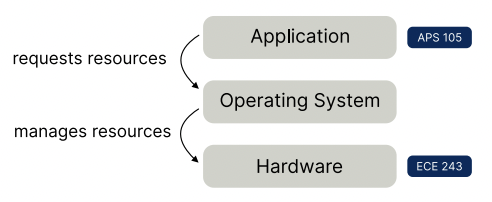
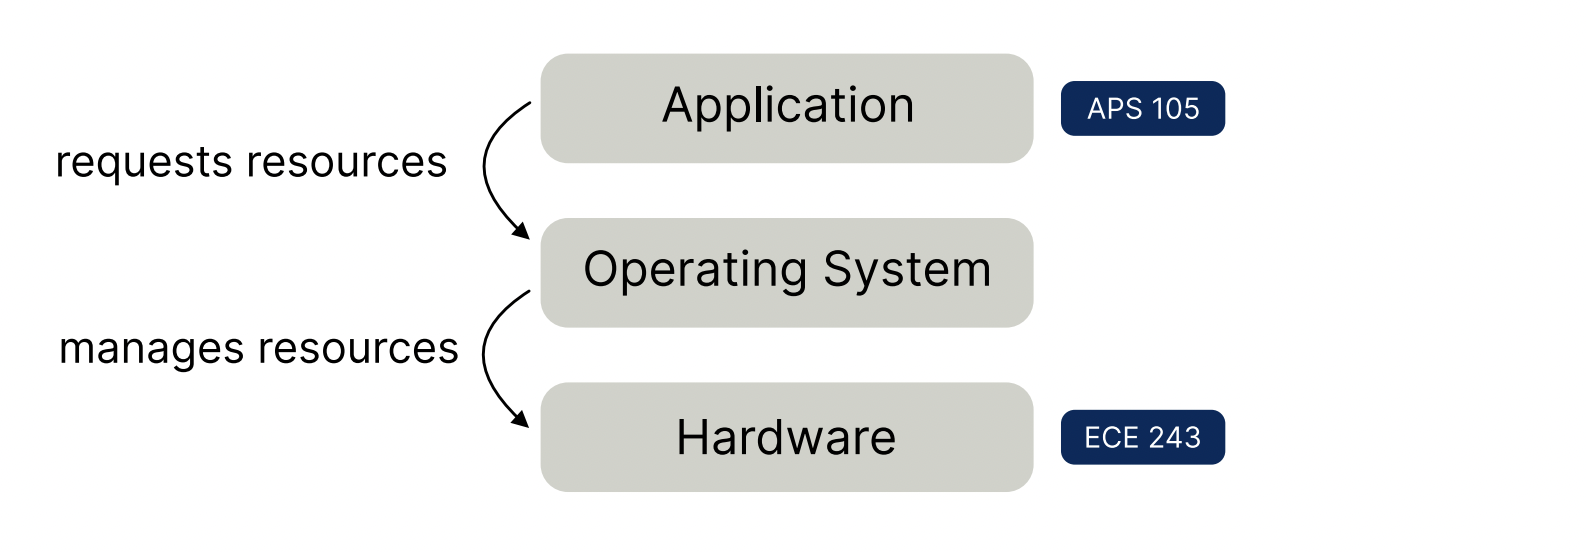

# Core Operating System Concepts

> - **Virtualization**: share one resource by mimicking multiple independent copies
> - **Concurrency**: handle multiple things happening at the same time (later)
> - **Persistence**: retain data consistency even without power (later)

## **1. Process**

> Program: a file containing all the instructions and data required to run  
> **Process**: an **instance** of running a program

What happens when we run 2 programs at the same time? Each process have its own stack and its own address?  
And then if a program runs out of space given by the OS, there is stack overflow and the OS would just kill the program?

### Problems:
- This means we would allocate a 'chunk' of memory to each process. This might be inefficient, as the program may not use that much memory
- Also, what about Global Variables? The compiler needs to *pick an address* for each global variable of a process

#### Potential Memory Layout for Multiple Processes

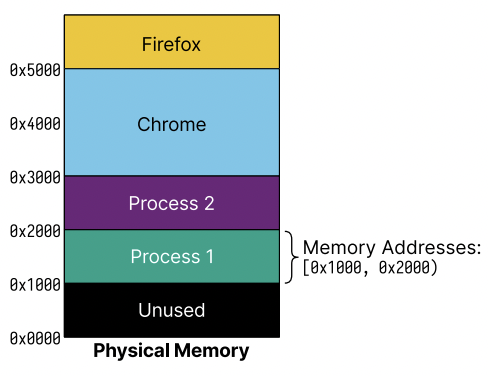

# Solution: Virtualization

> Each process have its own **virtual** registers, stack, and heap
>
> This means the OS makes each process "think" that it has entire control of the memory (even more than RAM). In reality, the OS still monitor and **maps** the process's memory to an actual memory address, but this is abstract to developers, and to the processes themselves.
> 

$\implies$ Therefore, consider this example: (run the same program in 2 terminals)
- Local pointers have **different** addresses (WHY?)
- Global pointers have the **same** address

### **NOTE** The addresses printed are by the processes, and is not the actual memory address (they are virtual!)

In [2]:
%%file run.c

#include <stdio.h>
#include <unistd.h>

static int global = 0;

int main(void) {
  int local = 0;
  while (1) {
    ++local;
    ++global;
    printf("local = %d, global = %d\n", local, global);
    sleep(1);
  }
  return 0;
}

Overwriting run.c


In [4]:
!gcc run.c -g -o run.o

In [5]:
!./run.o

local = 1, global = 1
local = 2, global = 2
local = 3, global = 3
local = 4, global = 4
local = 5, global = 5
local = 6, global = 6
local = 7, global = 7
^C


> A Process has its Own Virtual Memory
> 
> 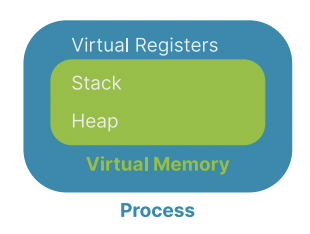